# Rossant_et_al_2011

code source: https://brian2.readthedocs.io/en/stable/examples/frompapers.Rossant_et_al_2011bis.html#distributed-synchrony-example

paper: https://www.jneurosci.org/content/31/47/17193

In [1]:
from brian2 import *

def Rossant2011(integrator):

    # neuron parameters
    theta = -55*mV
    El = -65*mV
    vmean = -65*mV
    taum = 5*ms
    taue = 3*ms
    taui = 10*ms
    eqs = Equations("""
                    dv/dt  = (ge+gi-(v-El))/taum : volt
                    dge/dt = -ge/taue : volt
                    dgi/dt = -gi/taui : volt
                    """)

    # input parameters
    p = 15
    ne = 4000
    ni = 1000
    lambdac = 40*Hz
    lambdae = lambdai = 1*Hz

    # synapse parameters
    we = .5*mV/(taum/taue)**(taum/(taue-taum))
    wi = (vmean-El-lambdae*ne*we*taue)/(lambdae*ni*taui)

    # NeuronGroup definition
    group = NeuronGroup(N=2, model=eqs, reset='v = El',
                        threshold='v>theta',
                        refractory=5*ms, method=integrator)
    group.v = El
    group.ge = group.gi = 0

    # independent E/I Poisson inputs
    p1 = PoissonInput(group[0:1], 'ge', N=ne, rate=lambdae, weight=we)
    p2 = PoissonInput(group[0:1], 'gi', N=ni, rate=lambdai, weight=wi)

    # independent E/I Poisson inputs + synchronous E events
    p3 = PoissonInput(group[1:], 'ge', N=ne, rate=lambdae-(p*1.0/ne)*lambdac, weight=we)
    p4 = PoissonInput(group[1:], 'gi', N=ni, rate=lambdai, weight=wi)
    p5 = PoissonInput(group[1:], 'ge', N=1, rate=lambdac, weight=p*we)

    # run the simulation
    M = SpikeMonitor(group)
    SM = StateMonitor(group, 'v', record=True)
    BrianLogger.log_level_info()
    run(1*second)
    # plot trace and spikes
    for i in [0, 1]:
        spikes = (M.t[M.i == i] - defaultclock.dt)/ms
        val = SM[i].v
        subplot(2, 1, i+1)
        plot(SM.t/ms, val)
        plot(tile(spikes, (2, 1)),
             vstack((val[array(spikes, dtype=int)],
                     zeros(len(spikes)))), 'C0')
        title("%s: %d spikes/second" % (["uncorrelated inputs", "correlated inputs"][i],
                                        M.count[i]))
    tight_layout()
    show()

    

exponential_euler


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


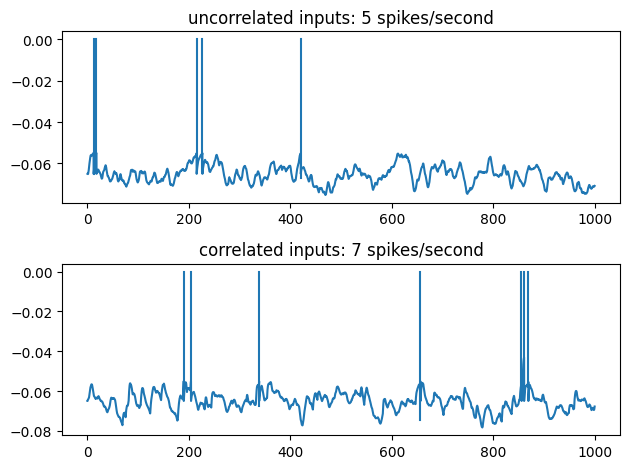

euler


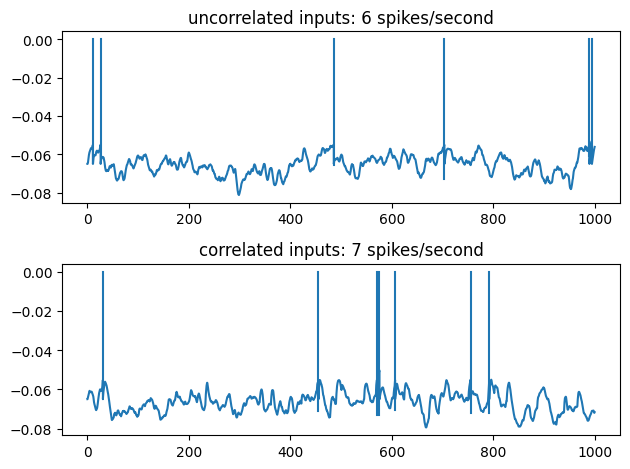

rk2


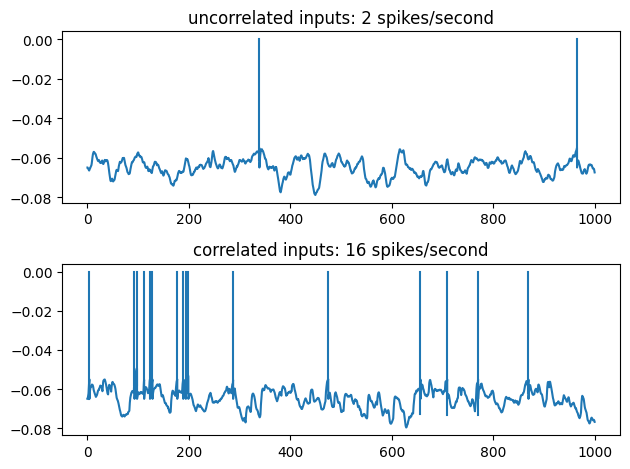

rk4


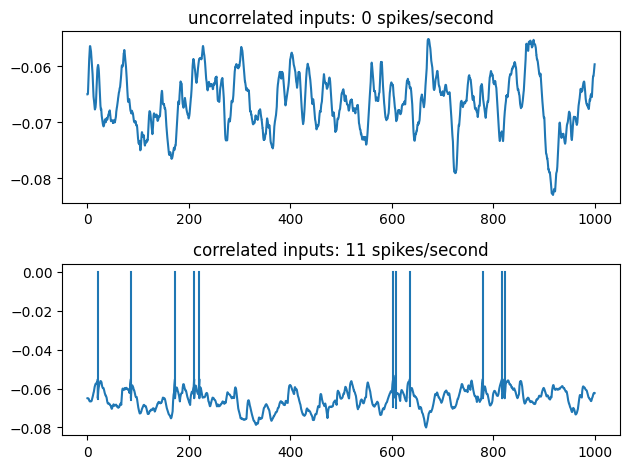

heun


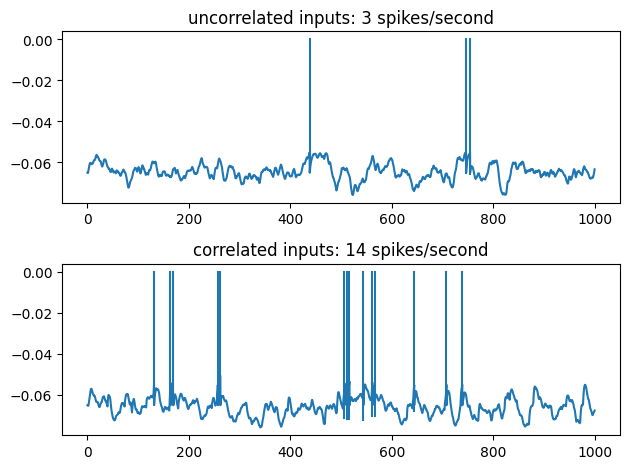

milstein


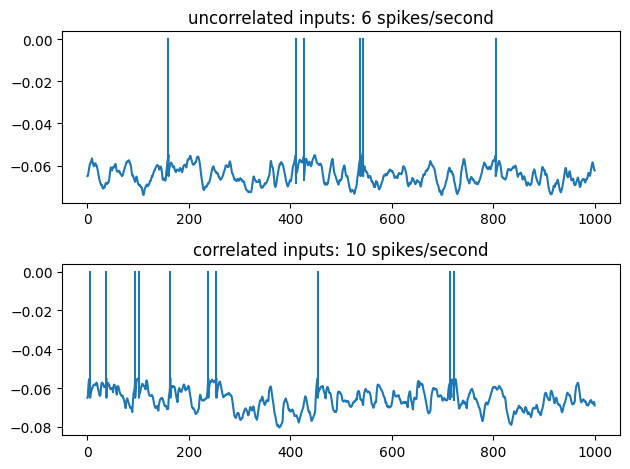

In [2]:
integrators=[#'exact', 
             'exponential_euler', 'euler', 'rk2', 'rk4', 'heun', 'milstein']
for integrator in integrators:
    print(integrator)
    Rossant2011(integrator)